In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Récupérez le fichier yob1880.txt et créez un DataFrame names_1880 à partir de ces données.
# Pour charger ce DataFrame vous utiliserez la méthode **read_csv** de Pandas.
# Renommez les colonnes avec l'argument **names** de cette méthode avec respectivement les noms suivants  :
# "name", "sex" et "birth".

names_1880 = pd.read_csv('../data/names/yob1880.txt', names=['name', 'sex', 'birth'])
names_1880

,name,sex,birth
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [4]:
# 2. Donnez le nombre de naissances par sexe pour l'année 1880.
grouped_df = names_1880.groupby('sex')['birth']

print(grouped_df.sum())

sex
F     90994
M    110490
Name: birth, dtype: int64


In [5]:
# 3. Créez un script permettant de récupérer les prénoms de 1880 à 2018 à partir des fichiers du dossier names et
# utiliser la méthode concat pour les rassembler.
# Utilisez la méthode concat de Pandas, vous pouvez également pour plus cohérence au niveau des index dans l'agrégation
# des données, ignorer les index de chaque DataFrame, avec le paramètre ignore_index = True dans la méthode concat.
# Dans ce cas les index seront 0 ... n-1 dans le DataFrame agrégé.

# Préparation de la concaténation des fichiers yobs
columns = ['name', 'sex', 'birth']
yobs = list()

# Script permettant d'agréger les données
for year in range(1880, 2021):
    path = f"../data/names/yob{year}.txt"
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    yobs.append(df)

names_df = pd.concat(yobs, ignore_index=True)
names_df

'''

Meilleure solution :

df_dict = {f"names_{i}":pd.read_csv(f"../data/names/yob{i}.txt",names=["name", "sex", "birth"]) for i in range(1880,2021)}
names = pd.concat(df_dict, ignore_index=True)

names

'''

'\n\nMeilleure solution :\n\ndf_dict = {f"names_{i}":pd.read_csv(f"../data/names/yob{i}.txt",names=["name", "sex", "birth"]) for i in range(1880,2021)}\nnames = pd.concat(df_dict, ignore_index=True)\n\nnames\n\n'

In [6]:
# 4. Agrégez les données pour avoir deux colonnes F et M. Et faites la somme des naissances par sexe et par année.
# Vous pouvez utiliser la méthode pivot_table.

total_births = names_df.pivot_table(values='birth', index='year', columns='sex', aggfunc=sum)

total_births.head()

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442


In [7]:
# Vous pouvez également comparer avec un groupby pour la représentation des données.
# Notez que par la suite nous utiliserons un groupby sur notre DataFrame de l'ensemble des prénoms.

names_df.groupby(['year', 'sex']).sum()
names_df.head()

,name,sex,birth,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


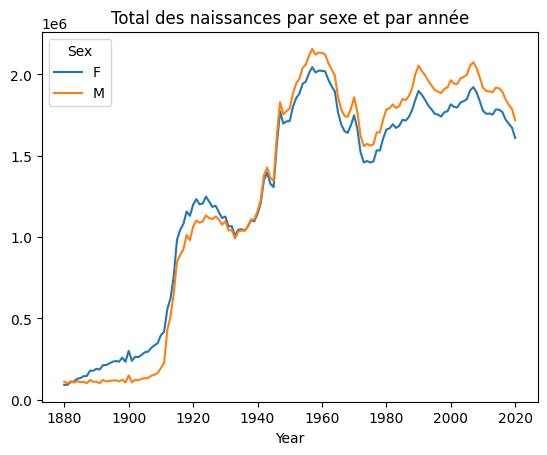

In [8]:
# 5. Représentez graphiquement le total des naissances par sexe et par année.

total_births.plot(title="Total des naissances par sexe et par année")
plt.xlabel("Year")
plt.legend(title="Sex");

In [9]:
# 6. Ajoutez une colonne prop au DataFrame, elle représentera le nombre d'enfants ayant reçu un prénom par rapport
# au nombre total de naissances : une valeur de 0.02 par exemple indiquera que 2 enfants sur 100 ont reçu un prénom donné.
# On regroupera ainsi les données par sexe et âge en ajoutant la colonne prop.

def get_counts(group):
    births = group.birth.astype(float)
    group['prop'] = births / births.sum()

    return group

names_df = names_df.groupby(['year', 'sex']).apply(get_counts)
names_df

,name,sex,birth,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2021239,Zykell,M,5,2020,0.000003
2021240,Zylus,M,5,2020,0.000003
2021241,Zymari,M,5,2020,0.000003
2021242,Zyn,M,5,2020,0.000003


In [21]:
# 7. Vérifiez maintenant que pour tous les groupes la somme des proportions est bien égale à 1.
# Utilisez la méthode **np.allclose** de Numpy.

np.allclose(names_df.groupby(['year', 'sex']).prop.sum(), 1)

True

In [11]:
# 8. Extrayez maintenant des sous-ensembles de 1000 prénoms par groupe de sexe et d'année.
# Créez une fonction get_top1000 qui les calculera.

def get_top1000(group):
        return group.sort_values(by=['birth'], ascending=False)[:1000]

top1000 = names_df.groupby(['year', 'sex']).apply(get_top1000)
top1000.drop(columns=['year', 'sex'], inplace=True)
top1000.head()

name  birth      prop
year sex                              
1880 F   0       Mary   7065  0.077642
         1       Anna   2604  0.028617
         2       Emma   2003  0.022012
         3  Elizabeth   1939  0.021309
         4     Minnie   1746  0.019188

In [19]:
# 9. Affichez, les prénoms par ordre décroissant de naissance pour l'année 1880.

ordered_desc_1880 = names_df[names_df['year'] == 1880].sort_values("birth", ascending=False)
ordered_desc_1880.head()

,name,sex,birth,year,prop
942,John,M,9655,1880,0.087383
943,William,M,9532,1880,0.086270
0,Mary,F,7065,1880,0.077642
944,James,M,5927,1880,0.053643
945,Charles,M,5348,1880,0.048403


In [20]:
# Et trouvez pour cette année le prénom le plus populaire quel que soit le sexe.

top1000.loc[1880, :].sort_values(by='birth', ascending=False)[:1]

,,name,birth,prop
sex,,,,
M,942,John,9655,0.087383


name     John   Harry    Mary  Marilyn
year                                  
1880   9701.0  2158.0  7092.0      NaN
1881   8795.0  2002.0  6948.0      NaN
1882   9597.0  2246.0  8178.0      NaN
1883   8934.0  2116.0  8044.0      NaN
1884   9428.0  2338.0  9253.0      NaN
...       ...     ...     ...      ...
2016  10040.0   377.0  2522.0    634.0
2017   9510.0   401.0  2416.0    584.0
2018   9179.0   428.0  2355.0    497.0
2019   8831.0   414.0  2226.0    462.0
2020   8236.0   343.0  2210.0    456.0

[141 rows x 4 columns]


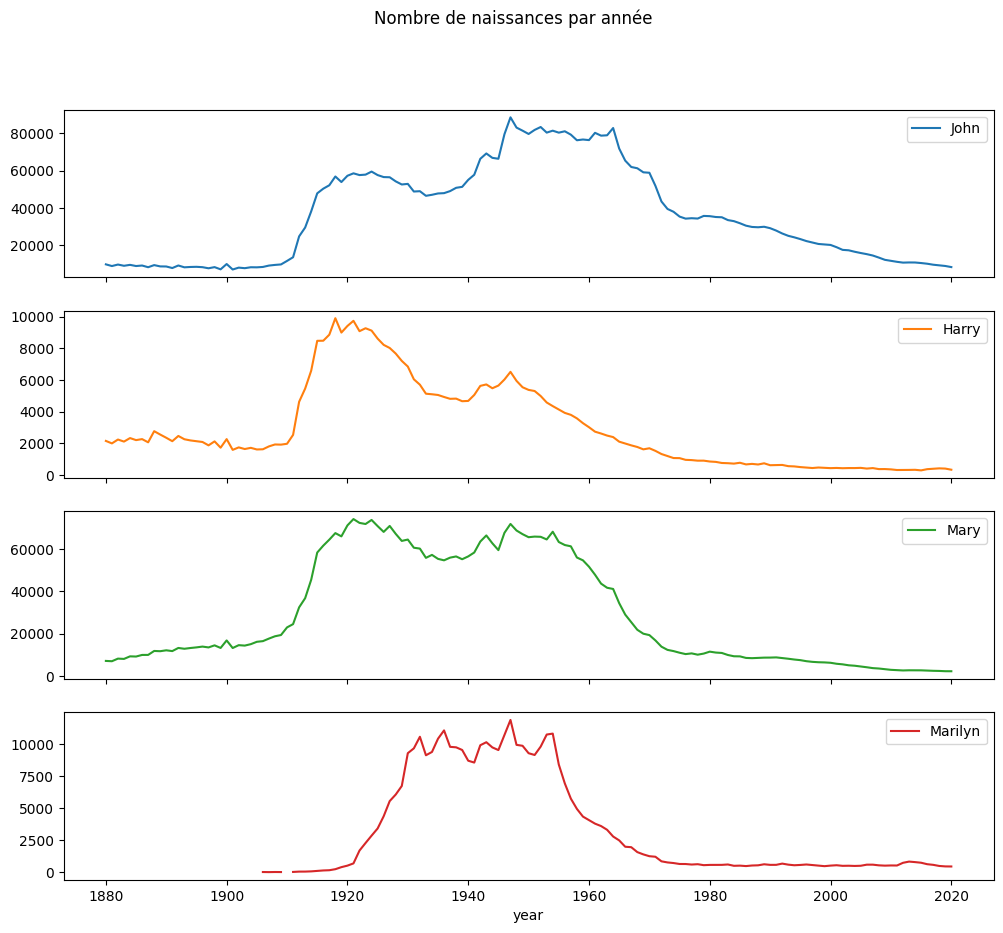

In [30]:
# 10. Etudiez maintenant la tendance des prénoms suivants : John, Harry, Mary, Marilyn ; faites un graphique.
# Créez une table de pivot du nombre total de naissances par an et par prénom.

total_births_top1000 = top1000.pivot_table(values='birth', index='year', columns='name', aggfunc=sum)
total_births_top1000 = total_births_top1000[['John', 'Harry', 'Mary', 'Marilyn']]

print(total_births_top1000)

# Représentation graphique du nombre de naissances par an
total_births_top1000.plot(subplots=True, figsize=(12,10), grid=False, title="Nombre de naissances par année");

                       name  birth      prop
year sex                                    
1880 F   0             Mary   7065  0.077642
         1             Anna   2604  0.028617
         2             Emma   2003  0.022012
         3        Elizabeth   1939  0.021309
         4           Minnie   1746  0.019188
...                     ...    ...       ...
2020 M   2008234    Jericho    213  0.000124
         2008233     Harris    213  0.000124
         2008235    Rogelio    212  0.000123
         2008236     Jerome    211  0.000123
         2008237      Karim    211  0.000123

[281876 rows x 3 columns]
sex          F         M
year                    
1880  1.000000  0.997375
1881  1.000000  1.000000
1882  0.998702  0.995646
1883  0.997596  0.998566
1884  0.993156  0.994539
...        ...       ...
2016  0.742007  0.837348
2017  0.740749  0.833604
2018  0.741476  0.829455
2019  0.739543  0.825452
2020  0.738055  0.822514

[141 rows x 2 columns]


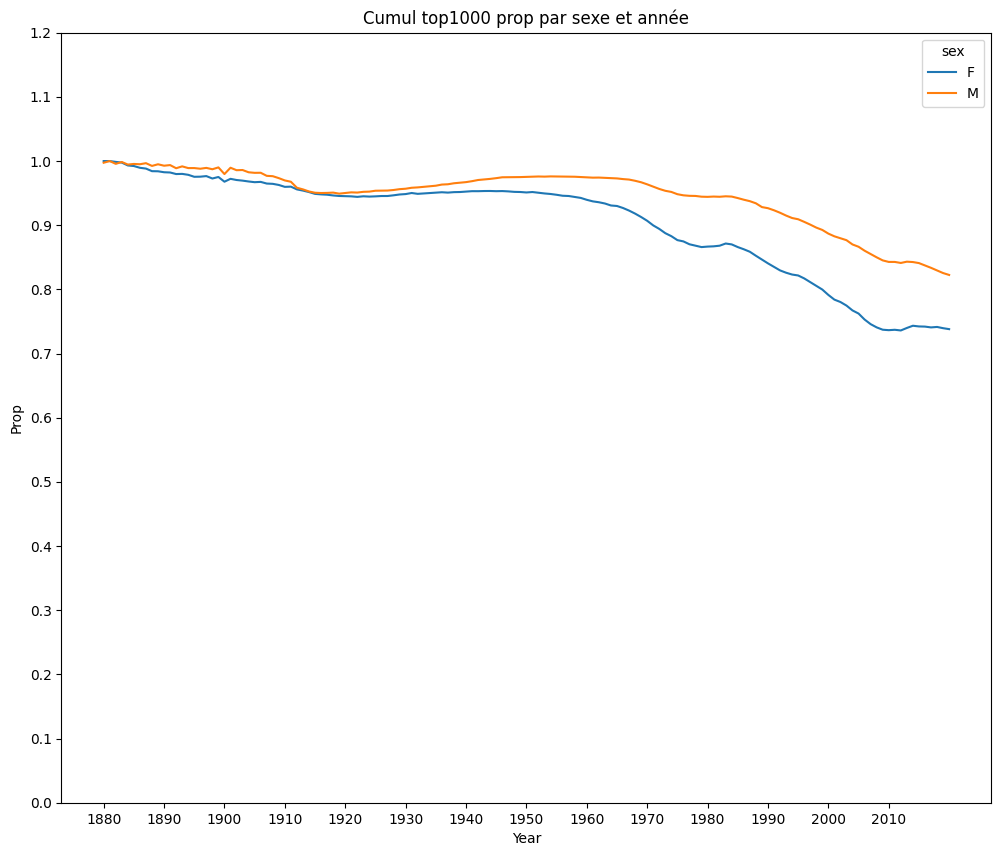

In [33]:
# 11. Essayez maintenant de mesurer la diversité des prénoms.
# Donnez une explication en fonction des résultats de cette tendance qui vous semble correspondre aux graphiques.
# Étudiez les proportions de prénoms dans les Top1000.

total_births_top1000_mesure = top1000.pivot_table(values='prop', index='year', columns='sex', aggfunc=sum)
print(top1000)
print(total_births_top1000_mesure)
# Il semble que les prénoms dans les Top1000 sont en baisse, ce qui pourrait signifier une plus grande diversité
# dans l'attribution des prénoms.

total_births_top1000_mesure.plot(
    title="Cumul top1000 prop par sexe et année",
    yticks=np.linspace(0, 1.2, 13),
    xticks=range(1880, 2020, 10),
    figsize = (12, 10)
)
plt.xlabel('Year')
plt.ylabel('Prop');